In [39]:
%matplotlib inline  #line magic to instruct Jupyter to capture Matplotlib plots and render them in the cell output.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="darkgrid")  #seaborn to visualize data in a dark background


UsageError: unrecognized arguments: #line magic to instruct Jupyter to capture Matplotlib plots and render them in the cell output.


In [40]:
df=pd.read_csv('fortune500.csv')   #reading in the data we will be working on

In [41]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [7]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [42]:
df.columns = ['year','rank','company','revenue','profit']

In [43]:
len(df)

25500

In [44]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

### checking the **data types** of each column. 
i will expect column 'profit' to be a float not an object.
Meaning some cells of profit were not represented as numbers/figures.
Let us investigate that


In [45]:
non_numeric_profits=df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


    non_numberic_profits = df.profit.str.contains('[^0-9.-]')
    df.loc[non_numberic_profits]

df.profit.str.contains('[^0-9.-]'):

df.profit: This assumes that df is a DataFrame, and it accesses the 'profit' column of that DataFrame.
.str: This is used to treat the column as a string, allowing string operations on it.
.contains('[^0-9.-]'): This checks if each element in the 'profit' column contains any character that is not a digit (0-9), a dot (.), or a hyphen (-). The regular expression [^0-9.-] matches any character that is not in the specified range or not a dot or hyphen.
non_numeric_profits = df.profit.str.contains('[^0-9.-]'):

This line creates a boolean Series (non_numeric_profits) where each element is True if the corresponding 'profit' contains non-numeric characters, and False otherwise.
df.loc[non_numeric_profits]:

This line uses boolean indexing to select rows from the DataFrame (df) where the condition specified by non_numeric_profits is True.
It returns a new DataFrame containing only the rows where the 'profit' column has non-numeric values.

In [46]:
#It appears that column 'profit' has some 'N.A.' entries instead of figures.
#Let us check if there is any other type of invalid entries that are not figures

set(df.profit[non_numeric_profits])

# This line of code is creating a Python set that contains unique non-numeric values from the 'profit' column of 
#the DataFrame (df). Let's break it down:

# df.profit[non_numeric_profits]:

# This part of the code is using boolean indexing to filter the 'profit' column of the DataFrame (df). 
#It selects only those rows where non_numeric_profits is True. In other words, it retrieves the 'profit' values 
#that are identified as non-numeric.
# set(...):

# The set() function is then applied to the filtered 'profit' values. 
#This creates a set, which is an unordered collection of unique elements. 
#In this case, it ensures that only unique non-numeric 'profit' values are included in the set.

{'N.A.'}

In [47]:
len(df.profit[non_numeric_profits])

369

If rows containing N.A. are, roughly, uniformly distributed over the years, 
the easiest solution would just be to remove them. 
So let’s have a quick look at the distribution.

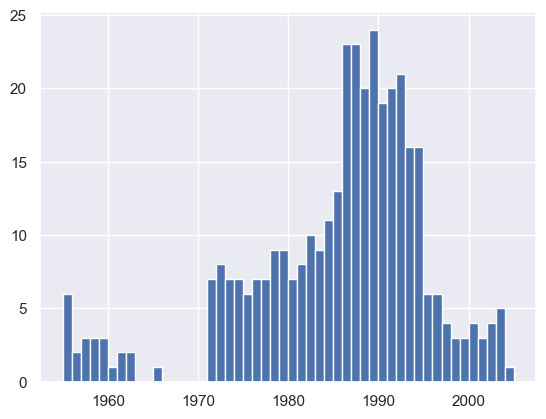

In [48]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955, 2006))

# This line of code uses the matplotlib.pyplot library to create a histogram of the 'year' column from 
#the DataFrame (df) for rows where 'profit' contains non-numeric values.

# df.year[non_numeric_profits]:

# This part of the code uses boolean indexing to select only those rows in the 'year' column 
#where non_numeric_profits is True. It retrieves the 'year' values corresponding to rows 
#where 'profit' contains non-numeric values.
# plt.hist(...):

# The plt.hist() function from the matplotlib.pyplot library is then used to create a histogram of 
#the selected 'year' values.
# bins=range(1955, 2006): This specifies the bins for the histogram. 
#It indicates that the histogram will be divided into bins, each representing a range of years from 1955 to 2005.
# bin_sizes, _, _ = ...:

# The result of plt.hist() includes three values. 
#The variable bin_sizes captures the counts of data points in each bin.
# The underscores (_) are used to ignore the second and third values returned by plt.hist(). 
#These values are the bin edges and patches, respectively, but they are not needed for further analysis.

In [49]:
bin_sizes


array([ 6.,  2.,  3.,  3.,  3.,  1.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  7.,  8.,  7.,  7.,  6.,  7.,  7.,  9.,  9.,  7.,
        8., 10.,  9., 11., 13., 23., 23., 20., 24., 19., 20., 21., 16.,
       16.,  6.,  6.,  4.,  3.,  3.,  4.,  3.,  4.,  5.,  1.])

At a glance, we can see that the most invalid values in a single year is fewer than 25, 
and as there are 500 data points per year, removing these values would account for less than 4% of the data 
for the worst years. Indeed, other than a surge around the 90s,
most years have fewer than half the missing values of the peak.

For our purposes, let’s say this is acceptable and go ahead and remove these rows.

In [51]:
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)


df = df.loc[~non_numeric_profits]:

This line of code uses boolean indexing to filter the DataFrame (df). 
It selects only those rows where non_numeric_profits is False. 
In other words, it filters out rows where the 'profit' column contains non-numeric values.
The ~ operator is used to negate the boolean values in non_numeric_profits. 
So, it selects rows where non_numeric_profits is False.
df.profit = df.profit.apply(pd.to_numeric):

This line converts the 'profit' column of the filtered DataFrame (df) to numeric values using
the pd.to_numeric function from the Pandas library.
The apply() function is used to apply the pd.to_numeric function to each element in the 'profit' column.

In [55]:
#Let check our new df-Data Frame
len(df)

25131

In [56]:
25131 + 369

25500

In [57]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

## Plotting with matplotlib
Next, we can get to addressing the question at hand by plotting the average profit by year. 
We might as well plot the revenue as well, so first we can define some variables 
and a method to reduce our code

In [62]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
y2 = avgs.revenue
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

This code snippet appears to be performing some operations on a DataFrame (df) related to 
grouping by the 'year' column, calculating averages, and defining a function to plot the results using matplotlib. 
Let's break it down step by step:

Grouping by Year:

group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
This line first selects a subset of the DataFrame (df) containing columns 'year', 'revenue', and 'profit'.
The groupby('year') method is then applied to group the DataFrame by the 'year' column.
Calculating Averages:


avgs = group_by_year.mean()
The mean() function is applied to the grouped DataFrame (group_by_year). 
This calculates the mean (average) values for each numeric column ('revenue' and 'profit') within each year.
Extracting X and Y Values:


x = avgs.index
y1 = avgs.profit
x is assigned the index of the avgs DataFrame, which corresponds to the unique years after grouping.
y1 is assigned the mean values of the 'profit' column.
Plotting Function:


def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
This defines a function named plot that takes x-values, y-values, a Matplotlib axis (ax), a title, 
and a y-axis label as parameters.
The function sets the title and y-axis label for the plot, plots the data using ax.plot(), 
and sets the margins to zero.
Overall, it seems like this code is preparing data by grouping it by year, 
calculating average values for revenue and profit, and providing a function (plot) 
that can be used to plot the results. 
The actual plotting of data might occur in subsequent parts of the code that are not shown here.


group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
This code performs the following operations:

Selecting Columns:

df.loc[:, ['year', 'revenue', 'profit']]
The loc indexer is used to select specific rows and columns from the DataFrame df.
: before the comma specifies that we want all rows.
['year', 'revenue', 'profit'] inside the square brackets specifies the columns we want to select: 'year', 'revenue', and 'profit'.

Grouping by Year:

.groupby('year')
After selecting the desired columns, the groupby('year') method is applied to group the DataFrame by the unique values in the 'year' column.
This creates a GroupBy object, group_by_year, which is a special DataFrameGroupBy object. It essentially represents a collection of DataFrames, each corresponding to a unique value in the 'year' column.

Empty Column and Comma:

The empty column before the comma , is used to specify that we want to select all rows.
The comma , itself is used to separate the row selection (:) from the column selection (['year', 'revenue', 'profit']).

This combination, df.loc[:, ['year', 'revenue', 'profit']], is a common syntax in Pandas for selecting specific rows and columns.

In summary, the code selects specific columns ('year', 'revenue', 'profit') from the DataFrame df and then groups the resulting DataFrame by the values in the 'year' column. This is useful when you want to perform aggregate operations or analyze data based on the unique values in the 'year' column. The empty column and comma in the df.loc[:, ...] syntax are used to specify the rows you want to select (in this case, all rows).

### 


fig, ax = plt.subplots()

plt.subplots():

This function creates a new figure and a set of subplots. If no arguments are provided, it returns a single subplot by default.

fig, ax = ...:

The return value of plt.subplots() is a tuple containing a Figure object (fig) and an Axes object or an array of Axes objects (ax).

fig represents the entire figure or the top-level container for all the plot elements.

ax represents the subplot or array of subplots where the actual data will be plotted.

Usage in Plotting:

Subsequent plotting commands can use the fig and ax objects to add data, labels, titles, and customize the appearance of the plot.
Example Usage:

python
Copy code
# Plotting a simple line
x = [1, 2, 3, 4, 5]

y = [2, 4, 6, 8, 10]

fig, ax = plt.subplots()

ax.plot(x, y)

# Customizing the plot
ax.set_title('Simple Line Plot')

ax.set_xlabel('X-axis')

ax.set_ylabel('Y-axis')

# Display the plot
plt.show()

In this example, fig, ax = plt.subplots() is used to create a figure (fig) and a single subplot (ax). The ax.plot(x, y) command then plots a line on the subplot, and the subsequent commands customize the plot's title, x-axis label, and y-axis label.

In summary, this line of code is a common and concise way to create a figure and a set of subplots for subsequent plotting in Matplotlib.









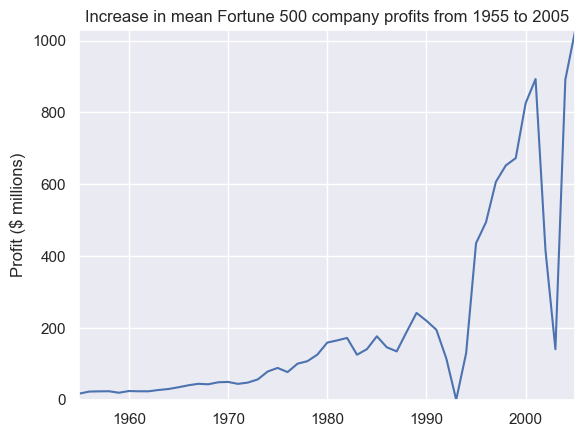

In [64]:
# Now lets Plot the graph
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit ($ millions)')

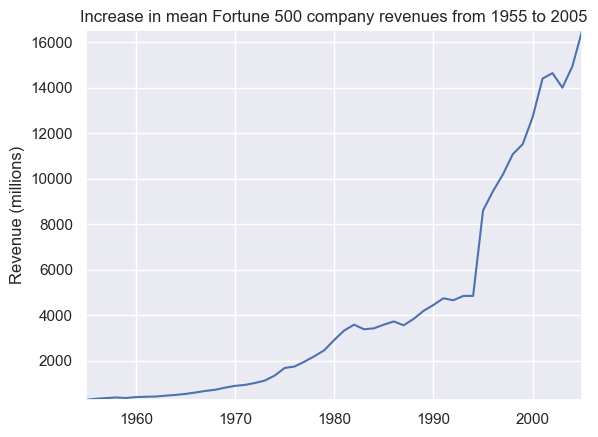

In [66]:
# Now lets Plot the graph showing the revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

That adds another side to the story. 
Revenues were not as badly hit — that’s some great accounting work from the finance departments

Let us superimpose these plots with +/- their standard deviations.

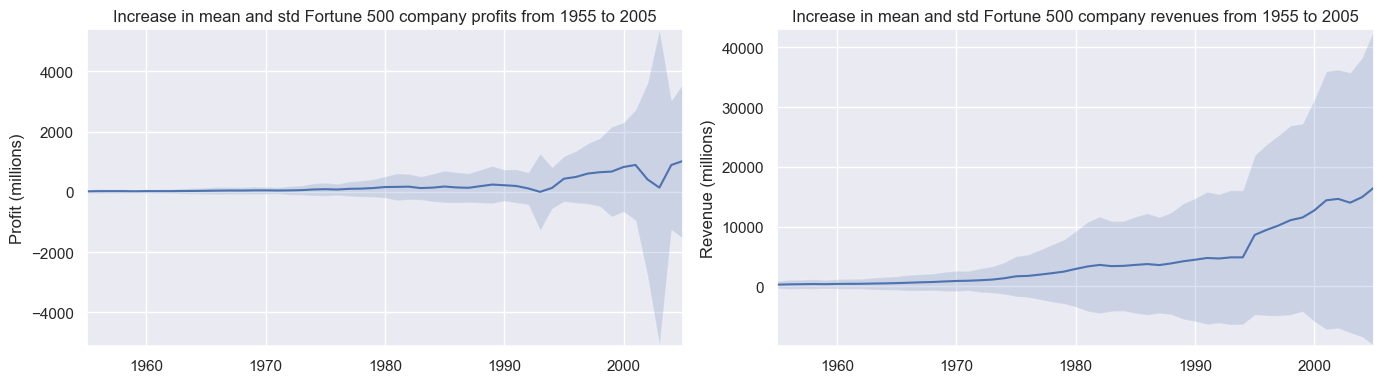

In [67]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

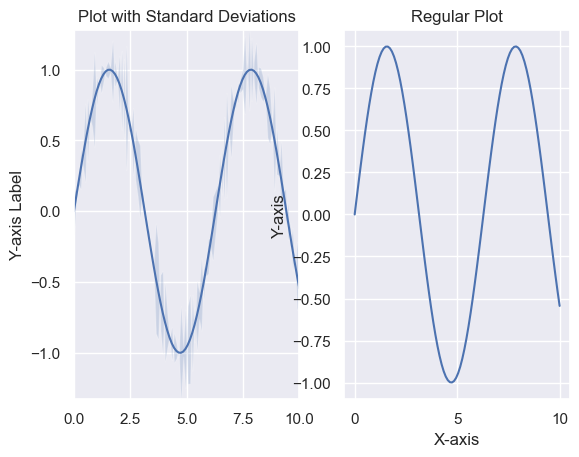

In [68]:
import numpy as np
#import matplotlib.pyplot as plt

# Example data
x = np.linspace(0, 10, 100)
y = np.sin(x)
stds = 0.2 * np.random.randn(100)  # Example standard deviations

# Creating the subplots and using the plot_with_std function
fig, (ax1, ax2) = plt.subplots(ncols=2)

plot_with_std(x, y, stds, ax1, 'Plot with Standard Deviations', 'Y-axis Label')
ax2.plot(x, y)
ax2.set_title('Regular Plot')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')

plt.show()


In [69]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %code_wrap  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %

In [70]:
pwd

'/Users/ctsalabs/Desktop/3MTT TRAINING/jupyter class'

In [71]:
pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 617.7 kB/s eta 0:00:0000:0100:02
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 436.1 kB/s eta 0:00:0000:0100:01


  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428784 sha256=2009cddebd67373468b295f1aaf4fa61e8b776ce95014acb682717d75e6ea605
  Stored in directory: /Users/ctsalabs/Library/Caches/pip/wheels/cd/25/fe/cb6f3e82f5b1921b0157ac9e32adb2e54806ec1befc446be21
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17483 sha256=b78e193ecaf8c05d9b722821eec0147e69b829672f84097a34ce101d638de59c
  Stored in directory: /Users/ctsalabs/Library/Caches/pip/wheels/37/c3/18/be7a983c1120f15dc0c2d1cb9c33749871a93b034185e00ced
Successfully built jupyter_contrib_nbextensions jupyter_contrib_core
[I 07:33:52 InstallContribNbextensionsApp] jupyter contrib nbextension install 
[I 07:33:52 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 07:33:52 InstallContribNbextensionsApp] Installing /Users/ctsalabs/anaconda3/lib/python3

[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/runtools/gutter.css -> /usr/local/share/jupyter/nbextensions/runtools/gutter.css
[I 07:33:52 InstallContribNbextensionsApp] - Validating: OK
[I 07:33:52 InstallContribNbextensionsApp] Installing /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/tree-filter -> tree-filter
[I 07:33:52 InstallContribNbextensionsApp] Making directory: /usr/local/share/jupyter/nbextensions/tree-filter/
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/tree-filter/tree-filter.yaml -> /usr/local/share/jupyter/nbextensions/tree-filter/tree-filter.yaml
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/tree-filter/index.js ->

[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/equation-numbering/button.png -> /usr/local/share/jupyter/nbextensions/equation-numbering/button.png
[I 07:33:52 InstallContribNbextensionsApp] - Validating: OK
[I 07:33:52 InstallContribNbextensionsApp] Installing /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/navigation-hotkeys -> navigation-hotkeys
[I 07:33:52 InstallContribNbextensionsApp] Making directory: /usr/local/share/jupyter/nbextensions/navigation-hotkeys/
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/navigation-hotkeys/icon.png -> /usr/local/share/jupyter/nbextensions/navigation-hotkeys/icon.png
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensio

[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/help_panel/help_panel.js -> /usr/local/share/jupyter/nbextensions/help_panel/help_panel.js
[I 07:33:52 InstallContribNbextensionsApp] Making directory: /usr/local/share/jupyter/nbextensions/help_panel/img
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/help_panel/img/handle-v.png -> /usr/local/share/jupyter/nbextensions/help_panel/img/handle-v.png
[I 07:33:52 InstallContribNbextensionsApp] - Validating: OK
[I 07:33:52 InstallContribNbextensionsApp] Installing /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/move_selected_cells -> move_selected_cells
[I 07:33:52 InstallContribNbextensionsApp] Making directory: /usr/local/share/jupyter/nbextensions/move_selected_cells/
[I 07:33:52 InstallContrib

[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/go_to_current_running_cell/go_to_current_running_cell.yaml -> /usr/local/share/jupyter/nbextensions/go_to_current_running_cell/go_to_current_running_cell.yaml
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/go_to_current_running_cell/auto_focus.gif -> /usr/local/share/jupyter/nbextensions/go_to_current_running_cell/auto_focus.gif
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/go_to_current_running_cell/eye.png -> /usr/local/share/jupyter/nbextensions/go_to_current_running_cell/eye.png
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/go_to_cur

[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/code_prettify/code_prettify.js -> /usr/local/share/jupyter/nbextensions/code_prettify/code_prettify.js
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/code_prettify/autopep8.js -> /usr/local/share/jupyter/nbextensions/code_prettify/autopep8.js
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/code_prettify/demo-R.gif -> /usr/local/share/jupyter/nbextensions/code_prettify/demo-R.gif
[I 07:33:52 InstallContribNbextensionsApp] Copying: /Users/ctsalabs/anaconda3/lib/python3.11/site-packages/jupyter_contrib_nbextensions/nbextensions/code_prettify/isort.js -> /usr/local/share/jupyter/nbextensions/code_prettify/isort.js
[I 07:33:52 InstallContribNbex

Note: you may need to restart the kernel to use updated packages.
